In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [2]:
from utils import load_data

def get_data(num_training=25709, num_validation=3000, num_pub_test=1000, num_pri_test=1000):
    """
    Load the dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    X_train, y_train, X_pub_test, y_pub_test, X_pri_test, y_pri_test = load_data()
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_pub_test))
    X_pub_test = X_pub_test[mask]
    y_pub_test = y_pub_test[mask]
    mask = list(range(num_pri_test))
    X_pri_test = X_pri_test[mask]
    y_pri_test = y_pri_test[mask]

#     # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_pub_test -= mean_image
    X_pri_test -= mean_image  
    return X_train, y_train, X_val, y_val, X_pub_test, y_pub_test, X_pri_test, y_pri_test
    #return X_train, y_train, X_pub_test, y_pub_test, X_pri_test, y_pri_test

# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_pub_test, y_pub_test
   del X_pri_test, y_pri_test
   print('Clear previously loaded data.')
except:
   pass

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_pub_test, y_pub_test, X_pri_test, y_pri_test = get_data()
#X_train, y_train, X_pub_test, y_pub_test, X_pri_test, y_pri_test = get_data()

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Public test data shape: ', X_pub_test.shape)
print('Public test labels shape: ', y_pub_test.shape)
print('Private test data shape: ', X_pri_test.shape)
print('Private test labels shape: ', y_pri_test.shape)

Train data shape:  (25709, 48, 48, 1)
Train labels shape:  (25709,)
Validation data shape:  (3000, 48, 48, 1)
Validation labels shape:  (3000,)
Public test data shape:  (1000, 48, 48, 1)
Public test labels shape:  (1000,)
Private test data shape:  (1000, 48, 48, 1)
Private test labels shape:  (1000,)


In [3]:
X_train[444].shape


(48, 48, 1)

3


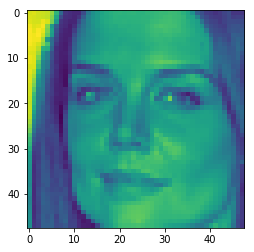

In [4]:
print(y_train[444])
plt.imshow(X_train[444].reshape(48, 48));

In [5]:
num_classes = 7

y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_pub_test = keras.utils.to_categorical(y_pub_test, num_classes)
y_pri_test = keras.utils.to_categorical(y_pri_test, num_classes)

In [6]:
y_train[444]

array([0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [7]:
# As before, let's make everything float and scale
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_pub_test = X_pub_test.astype('float32')
X_pri_test = X_pri_test.astype('float32')

X_train /= 255
X_val /= 255
X_pub_test /= 255
X_pri_test /= 255

In [16]:
#VGG MODEL
# Create model_2 as mentioned in the exercise
# Let's build a CNN using Keras' Sequential capabilities
from keras.layers.normalization import BatchNormalization
model = Sequential()

model.add(Conv2D(16, (2, 2), padding="same",
input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

# (CONV => RELU) * 2 => POOL
model.add(Conv2D(32, (2, 2), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(32, (2, 2), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# (CONV => RELU) * 2 => POOL
model.add(Conv2D(64, (2, 2), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (2, 2), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# first (and only) set of FC => RELU layers
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# softmax classifier
model.add(Dense(7))
model.add(Activation("softmax"))

model.summary()
X_train.shape[1:]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 48, 48, 16)        80        
_________________________________________________________________
activation_30 (Activation)   (None, 48, 48, 16)        0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 48, 48, 16)        64        
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 32)        2080      
_________________________________________________________________
activation_31 (Activation)   (None, 16, 16, 32)        0         
__________

(48, 48, 1)

In [17]:
batch_size = 64

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0005, decay=1e-6)
sgd = SGD(lr=0.05, decay=1e-6, momentum=0.9, nesterov=True)
adam =Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=50,
              validation_data=(X_val, y_val),
              shuffle=True)

Train on 25709 samples, validate on 3000 samples
Epoch 1/50
25709/25709 [==============================] - 48s 2ms/step - loss: 2.1486 - acc: 0.2601 - val_loss: 1.6227 - val_acc: 0.3757
Epoch 2/50
25709/25709 [==============================] - 44s 2ms/step - loss: 1.6666 - acc: 0.3521 - val_loss: 1.5034 - val_acc: 0.4117
Epoch 3/50
25709/25709 [==============================] - 37s 1ms/step - loss: 1.5503 - acc: 0.3971 - val_loss: 1.3804 - val_acc: 0.4650
Epoch 4/50
25709/25709 [==============================] - 37s 1ms/step - loss: 1.4803 - acc: 0.4289 - val_loss: 1.3641 - val_acc: 0.4733
Epoch 5/50
25709/25709 [==============================] - 37s 1ms/step - loss: 1.4319 - acc: 0.4482 - val_loss: 1.3269 - val_acc: 0.4870
Epoch 6/50
25709/25709 [==============================] - 37s 1ms/step - loss: 1.3903 - acc: 0.4655 - val_loss: 1.2931 - val_acc: 0.4993
Epoch 7/50
25709/25709 [==============================] - 37s 1ms/step - loss: 1.3597 - acc: 0.4800 - val_loss: 1.2495 - val_acc:

In [20]:
#Save trained model and history
import pickle
f = open('history.pckl', 'wb')
pickle.dump(history.history, f)
f.close()

filename = 'Trained_VGG.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# from keras.utils import plot_model
# plot_model(model, to_file='model.png')

In [ ]:
# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot
# SVG(model_to_dot(model).create(prog='dot', format='svg'))